# Wigner’s semi-circle law

- Eigenvalues of a random matrix
- Take a large-dimensional (dimension 100, 1000, or more) square random matrix whose elements are independently drawn from $N (0\sim 1)$ and plot a histogram of its eigenvalues to illustrate Wigner’s semicircle law (en.wikipedia.org/wiki/Wigner_semicircle_distribution).

In [48]:
import numpy as np
from scipy import linalg as LA
from random import gauss
from math import sqrt
import matplotlib.pylab as plt
import imageio.v2 as imageio
import os

Consider a random matrix $X \in \mathbb{R}^n$.

In [42]:
n = 100                          # dimension of the random matrix
x = np.zeros((n,n))             # initialize a two-dimensional array
for i in range(n):
    for j in range(i,n):
        x[i, j] = gauss(0,1)    # random element
        x[j, i] = x[i, j]       # symmetrically placed element

Set $Y=\frac{X}{\sqrt{n}}$ for scaling the radius of our semicircle.

In [43]:
y = x / np.sqrt(n)

Compute eigenvalues and take their real part (imaginary is zero anyway because x is symmetric).

In [44]:
evals = LA.eigvals(y).real

Plot the empirical spectral ditribution of all eigenvalues.

26.0 1.9932306155807582


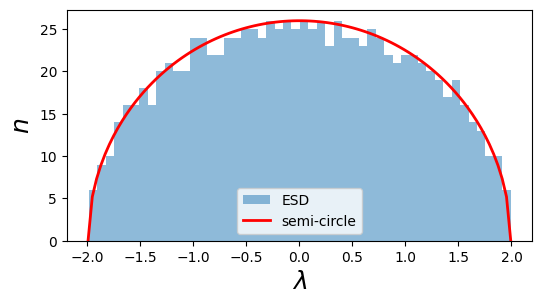

In [67]:
evals = LA.eigvals(rm(1000)).real      # compute eigenvalues and take their real part (imaginary is zero anyway because x is symmetric)
plt.figure(figsize = (6, 3))
bins, vals, patches = plt.hist(evals.real, bins = 50, label='ESD', histtype='stepfilled', alpha=0.5)   # draw the histogram of all eigenvalues
H = max(bins)                                           # height of the circle
R = max(abs(vals))                                      # radius of the circle
x = np.linspace(-R,R,100)                               # an x-grid to draw the semicircle
y = np.array([H*sqrt(1-(xval/R)**2) for xval in x])     # y-values for the semicircle
print(H, R)

                                     # a bit of margin at the top
plt.plot(x, y, color = 'r', linewidth = 2, label='semi-circle')              # plot the semicircle
plt.xlabel(r'$\lambda$', fontsize = 18)                 # label x-axis
plt.ylabel(r'$n$', fontsize = 18)                       # label y-axis
plt.legend()
# plt.axes().set_aspect(R/H)                              # aspect ratio 1:1 (so that our distribution looks like a circle)
plt.savefig('wigner.pdf')                               # save the output
plt.show()

Let's see the process of convergence of spectral distribution from $n=5$ to $n=5000$.

![](./wigner semicircle.gif)

In [68]:
def rm(n):
    x = np.zeros((n,n))             # initialize a two-dimensional array
    for i in range(n):
        for j in range(i,n):
            x[i, j] = gauss(0,1)    # random element
            x[j, i] = x[i, j]       # symmetrically placed element
    return x / np.sqrt(n)

In [69]:
filenames = []
gif_name = 'wigner semicircle'

for i, n in enumerate(np.arange(10, 2000, 10)):
    evals = LA.eigvals(rm(n)).real
    bins, vals, patches = plt.hist(evals.real, bins = 50, label='ESD', histtype='stepfilled', alpha=0.5)   # draw the histogram of all eigenvalues
    plt.xlabel(r'$\lambda$', fontsize = 18)                 # label x-axis
    plt.ylabel(r'$n$', fontsize = 18)                       # label y-axis
    plt.legend()

    filename = f'{i}.png'
    filenames.append(filename)
    plt.savefig(filename)
    plt.close()
    
# Build GIF
print('Creating gif\n')
with imageio.get_writer(f'{gif_name}.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
print('Gif saved\n')
print('Removing Images\n')
# Remove files
for filename in set(filenames):
    os.remove(filename)
print('DONE')

Creating gif

Gif saved

Removing Images

DONE


![wigner semicircle](wigner semicircle.gif)